### 1. Taylor 展开

### 2 . 考察Gini系数的图像、熵、分类误差率三者之间的关系
* 将$f(x)= -\ln x $在$x=1$处一阶Taylor展开，忽略高阶无穷小，得到$f(x) \approx 1-x$
$$\begin{align} 
H(X) &= -\sum_{k=1}^K p_k \ln p_k \\
     &\approx \sum_{k=1}^K p_k(1-p_k)
\end{align}$$

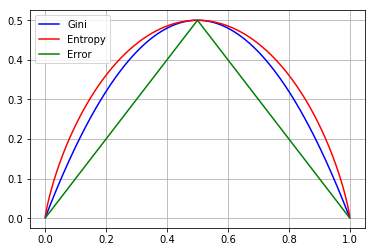

In [16]:
import numpy as np
import matplotlib.pylab as plt
p = np.arange(0.001, 1, 0.001, dtype=np.float)
gini = 2*p*(1-p)
entropy = -(p*np.log2(p) + (1-p)*np.log2(1-p))/2
error = 1 - np.max(np.vstack((p, 1-p)), 0)
plt.plot(p, gini, 'b-', label = 'Gini')
plt.plot(p, entropy, 'r-', label = 'Entropy')
plt.plot(p, error, 'g-', label = 'Error')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

### 3. 方向导数与梯度
* 如果函数$z=f(x,y)$在点$P(x,y)$是可微分的，那么，函数在该点沿任一方向$L$的方向导数都存在，且有:
    $$\frac{\partial f}{\partial l} = \frac{\partial f}{\partial x} \cos \varphi + \frac{\partial f}{\partial y} \sin \varphi $$
    其中$\varphi$ 为为$x$轴到方向$L$的转角
* 设函数$z=f(x,y)$在平面区域$D$内具有一阶连续偏导数，则对于每一个点$P(x,y) \in D$，向量
$$\left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right)$$
为函数$z=f(x,y)$在点$P$的梯度,记做$\mathbf {grad} f(x,y)$
    * 梯度的方向是函数在该点变化(增加)最快的方向，同理负梯度方向为函数减小最快的方向，因此经常会用到梯度下降法求解优化问题的最小值，即沿着负梯度方向下降，最终收敛在极值点。
    * 方向导数可以用梯度重写：
    $$\frac{\partial f}{\partial l} = \mathbf {grad} f(x,y)\cdot \left(\cos \varphi, \sin \varphi\right)$$

### 4. $\Gamma$函数
* $\Gamma$函数是阶乘在实数上的推广
$$\Gamma(x) = (x-1)\Gamma(x-1) \Rightarrow \frac{\Gamma(x)}{\Gamma(x-1)} = x-1 $$
$$\Gamma(x) = \int_0^\infty t^{x-1}e^{-t}dt = (x-1)!$$

[  1   1   2   6  24 120]


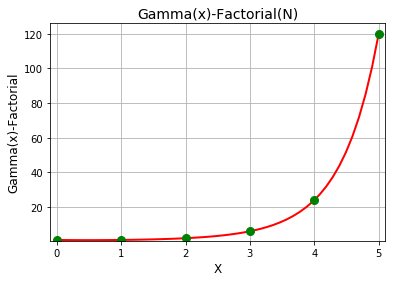

In [14]:
#coding:utf-8
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.special import factorial
N = 5
x = np.linspace(0, N, 50)
y = gamma(x + 1)
plt.figure('facecolor=w')
plt.plot(x, y, 'r-', lw=2)
z = np.arange(0, N + 1)
f = factorial(z, exact=True)
print(f)
plt.plot(z, f, 'go', markersize=8)
plt.grid(b= True)
plt.xlim(-0.1, N + 0.1)
plt.ylim(0.5, np.max(y)*1.05)
plt.xlabel('X', fontsize=12)
plt.ylabel('Gamma(x)-Factorial', fontsize=12)
plt.title('Gamma(x)-Factorial(N)', fontsize=14)
plt.show()

### 5. 凸函数
* 若函数$f$定义域$dom f$为凸集, 且满足：
$\forall x, y \in dom f, 0 \le \theta \le 1$  有：
$$f(\theta x + (1-\theta)y) \le \theta f(x) + (1-\theta)f(y)$$

* 若函数$f$一阶可微，则$f$为凸函数当且仅当定义域$dom f$为凸集, 且：
$\forall x, y \in dom f, 0 \le \theta \le 1$  有：
$$f(y) \ge  f(x) + \nabla f^T(x)(y-x)$$

* 若函数$f$二阶可微，则$f$为凸函数当且仅当定义域$dom f$为凸集, 且：
$\forall x \in dom f$  有：
$$\nabla^2 f(x) \ge  0$$
    * 若$f$ 为一元函数，上式表示二阶导数大于0
    * 若$f$ 为多远函数，则表示二阶导数 **Hessian** 矩阵半正定
* 凸函数实例
    - 指数函数 $f(x) = e^{ax}$
    - 幂函数 $f(x) = x^a, x \in R^+, a\ge1$或者 $a \lt 0$
    - 负对数函数 $f(x) = -\ln (x)$
    - 负熵函数 $f(x) = x\ln (x)$
    - 范数函数 $f(\vec x) = \|x\|$
    - 最大值函数 $f(\vec x) = max(x_1, x_2, \ldots, x_n)$
    - 指数线性函数 $f(\vec x) = \log \left(e^x{_1} + e^x{_2} + \cdots + e^x{_n}\right)$

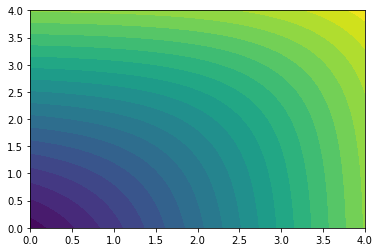

In [17]:
'''
plot log(e^x + e^y)
'''
fig= plt.figure()
ax = fig.add_subplot(111)
u = np.linspace(0, 4, 1000)
x, y = np.meshgrid(u, u)
z = np.log(np.exp(x) + np.exp(y))
ax.contourf(x, y, z, 20)
plt.show()